# WeatherPy
----

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

627

### Perform API Calls

In [3]:
print('Beginning Data Retrieval\n-----------------------------')

record = 0
city_list = []
country_list = []
lat_list = []
lng_list = []
date_list = []
maxtemp_list = []
humidity_list = []
cloudiness_list = []
windspeed_list = []

for city in cities:
    response = requests.get(f'http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=imperial&q={city}')
    if(str(response) == '<Response [200]>'):
        record += 1
        print(f"Processing Record {record} | {response.json()['name']}")
        city_list.append(response.json()['name'])
        country_list.append(response.json()['sys']['country'])
        lat_list.append(response.json()['coord']['lat'])
        lng_list.append(response.json()['coord']['lon'])
        date_list.append(response.json()['dt'])
        maxtemp_list.append(response.json()['main']['temp_max'])
        humidity_list.append(response.json()['main']['humidity'])
        cloudiness_list.append(response.json()['clouds']['all'])
        windspeed_list.append(response.json()['wind']['speed'])
    else:
        print('City not found. Skipping...')
    time.sleep(1)
print('-----------------------------\nData Retrieval Complete\n-----------------------------')

Beginning Data Retrieval
-----------------------------
Processing Record 1 | Verkhnyaya Maksakovka
Processing Record 2 | Zhuhai
Processing Record 3 | Mar del Plata
City not found. Skipping...
Processing Record 4 | Ayagoz
Processing Record 5 | Muroto
Processing Record 6 | Punta Arenas
Processing Record 7 | Taiobeiras
Processing Record 8 | Carnarvon
Processing Record 9 | Sitka
City not found. Skipping...
Processing Record 10 | Ponta do Sol
Processing Record 11 | Busselton
City not found. Skipping...
Processing Record 12 | Ilheus
Processing Record 13 | Yakeshi
Processing Record 14 | Coolum Beach
Processing Record 15 | Weyburn
Processing Record 16 | Luderitz
City not found. Skipping...
Processing Record 17 | Hobart
Processing Record 18 | Avarua
Processing Record 19 | Buta
Processing Record 20 | Rikitea
Processing Record 21 | Ushuaia
Processing Record 22 | Aklavik
City not found. Skipping...
Processing Record 23 | Souillac
City not found. Skipping...
Processing Record 24 | Fortuna
Processin

Processing Record 227 | Tura
Processing Record 228 | Khatanga
Processing Record 229 | Kinablangan
Processing Record 230 | Dehloran
Processing Record 231 | Brumadinho
Processing Record 232 | Nome
Processing Record 233 | Bitung
City not found. Skipping...
Processing Record 234 | Coihaique
Processing Record 235 | Lorengau
Processing Record 236 | Ponta Delgada
Processing Record 237 | Yulara
Processing Record 238 | Grand-Santi
Processing Record 239 | Saskylakh
Processing Record 240 | Beyneu
Processing Record 241 | Ribeira Grande
Processing Record 242 | Kruisfontein
Processing Record 243 | Turayf
Processing Record 244 | Touros
Processing Record 245 | Cidreira
Processing Record 246 | Ust-Kuyga
Processing Record 247 | Jian
Processing Record 248 | Havre-Saint-Pierre
Processing Record 249 | Somerset
Processing Record 250 | Issa
Processing Record 251 | Buenos Aires
Processing Record 252 | Puerto Baquerizo Moreno
City not found. Skipping...
Processing Record 253 | Coquimbo
Processing Record 254 | 

Processing Record 445 | Kulebaki
Processing Record 446 | Pitimbu
Processing Record 447 | Lima
City not found. Skipping...
Processing Record 448 | Tinogboc
Processing Record 449 | Nanortalik
Processing Record 450 | Saint-Pierre
Processing Record 451 | Alamosa
Processing Record 452 | Tonota
Processing Record 453 | Kushima
Processing Record 454 | San Carlos
Processing Record 455 | Ploemeur
Processing Record 456 | Saint-Augustin
Processing Record 457 | Helmsdale
Processing Record 458 | Samoded
Processing Record 459 | Pittsburg
Processing Record 460 | Christchurch
Processing Record 461 | Bonavista
Processing Record 462 | Edd
Processing Record 463 | Clyde River
City not found. Skipping...
Processing Record 464 | Sangar
City not found. Skipping...
Processing Record 465 | Xiamen
Processing Record 466 | Deer Lake
Processing Record 467 | Ingham
Processing Record 468 | Coxim
Processing Record 469 | Xalpatlahuac
Processing Record 470 | Manaus
Processing Record 471 | Wana
Processing Record 472 | Ra

### Convert Raw Data to DataFrame

In [4]:
weather_df = pd.DataFrame({'City':city_list,
                           'Country':country_list,
                           'Lat':lat_list,
                           'Lng':lng_list,
                           'Date':date_list,
                           'Max Temp':maxtemp_list,
                           'Humidity':humidity_list,
                           'Cloudiness':cloudiness_list,
                           'Wind Speed':windspeed_list})

In [5]:
weather_df.head()

,City,Country,Lat,Lng,Date,Max Temp,Humidity,Cloudiness,Wind Speed
0,Verkhnyaya Maksakovka,RU,61.63,50.97,1569430942,35.60,100,75,4.47
1,Zhuhai,CN,40.71,112.04,1569430943,51.80,66,0,8.95
2,Mar del Plata,AR,-46.43,-67.52,1569430697,67.43,33,70,25.30
3,Ayagoz,KZ,47.96,80.43,1569430946,55.73,34,79,4.05
4,Muroto,JP,33.37,134.14,1569430947,64.37,75,1,6.15


In [6]:
weather_df.to_csv(output_data_file, index=False, header=True)

### Plotting the Data

#### Latitude vs. Temperature Plot

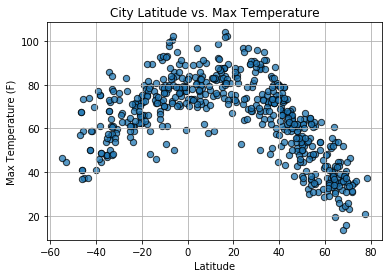

In [7]:
weather_df.plot(kind='scatter', x='Lat', y='Max Temp', s=40, edgecolors='k', alpha=0.75)
plt.grid()
plt.title('City Latitude vs. Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

plt.savefig('output_data/lat_vs_maxtemp.png')

plt.show()

As a city's latitude approaches zero from either direction, max temperature increase. This supports the claim that temperatures are higher along the equator. The relation may seem off center due to Earth's tilt.

#### Latitude vs. Humidity Plot

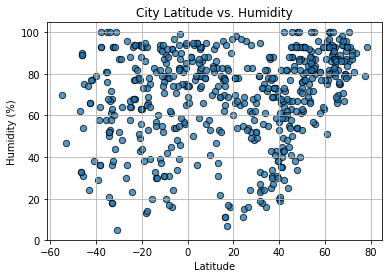

In [8]:
weather_df.plot(kind='scatter', x='Lat', y='Humidity', s=40, edgecolors='k', alpha=0.75)
plt.grid()
plt.title('City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

plt.savefig('output_data/lat_vs_humidity.png')

plt.show()

Humidity levels are somewhat evenly spread across all latitudes. There is no discernable relation from this data.

#### Latitude vs. Cloudiness Plot

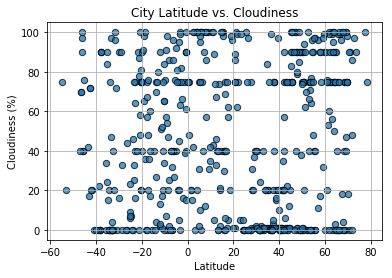

In [9]:
weather_df.plot(kind='scatter', x='Lat', y='Cloudiness', s=40, edgecolors='k', alpha=0.75)
plt.grid()
plt.title('City Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

plt.savefig('output_data/lat_vs_cloudiness.png')

plt.show()

Cloudiness is somewhat evenly spread across all latitudes. There is no discernable relation from this data.

#### Latitude vs. Wind Speed Plot

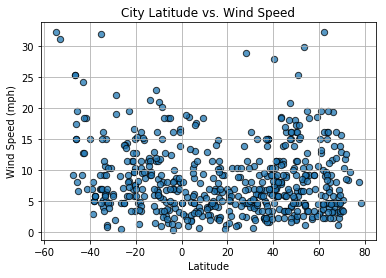

In [10]:
weather_df.plot(kind='scatter', x='Lat', y='Wind Speed', s=40, edgecolors='k', alpha=0.75)
plt.grid()
plt.title('City Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

plt.savefig('output_data/lat_vs_windspeed.png')

plt.show()

Wind speeds are somewhat evenly spread across all latitudes. There is no discernable relation from this data.

## Linear Regression

In [11]:
northern_df = weather_df.loc[weather_df['Lat'] >= 0].reset_index(drop=True)
southern_df = weather_df.loc[weather_df['Lat'] < 0].reset_index(drop=True)

In [12]:
northern_df.head()

,City,Country,Lat,Lng,Date,Max Temp,Humidity,Cloudiness,Wind Speed
0,Verkhnyaya Maksakovka,RU,61.63,50.97,1569430942,35.60,100,75,4.47
1,Zhuhai,CN,40.71,112.04,1569430943,51.80,66,0,8.95
2,Ayagoz,KZ,47.96,80.43,1569430946,55.73,34,79,4.05
3,Muroto,JP,33.37,134.14,1569430947,64.37,75,1,6.15
4,Sitka,US,37.17,-99.65,1569430952,80.01,69,3,8.99


In [13]:
southern_df.head()

,City,Country,Lat,Lng,Date,Max Temp,Humidity,Cloudiness,Wind Speed
0,Mar del Plata,AR,-46.43,-67.52,1569430697,67.43,33,70,25.30
1,Punta Arenas,CL,-53.16,-70.91,1569430948,44.60,47,20,31.09
2,Taiobeiras,BR,-15.81,-42.23,1569430949,89.39,20,0,8.66
3,Carnarvon,ZA,-30.97,22.13,1569430951,59.87,5,0,10.42
4,Ponta do Sol,BR,-20.63,-46.00,1569430954,74.27,56,81,5.84


####  Northern Hemisphere - Latitude vs. Max Temp Linear Regression

R-Squared: 0.6669913168383963
P-Value: 0.0000000000
Regression Line: y = -0.79x + 93.54


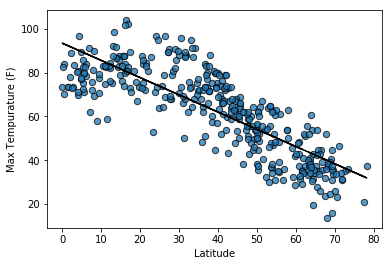

In [14]:
northern_df.plot(kind='scatter', x='Lat', y='Max Temp', s=40, edgecolors='k', alpha=0.75)
plt.xlabel('Latitude')
plt.ylabel('Max Tempurature (F)')

(northtemp_slope, northtemp_intercept, northtemp_r, northtemp_p, northtemp_stderr) = linregress(northern_df['Lat'], northern_df['Max Temp'])
northtemp_regress = northern_df['Lat'] * northtemp_slope + northtemp_intercept
plt.plot(northern_df['Lat'], northtemp_regress, color='k')

print(f'R-Squared: {northtemp_r**2}')
print(f'P-Value: {format(northtemp_p,".10f")}')
print(f'Regression Line: y = {round(northtemp_slope, 2)}x + {round(northtemp_intercept, 2)}')
plt.show()

####  Southern Hemisphere - Latitude vs. Max Temp Linear Regression

R-Squared: 0.4062416082972062
P-Value: 0.0000000000
Regression Line: y = 0.63x + 82.53


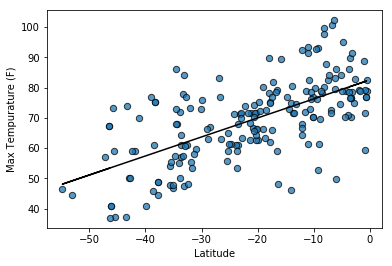

In [15]:
southern_df.plot(kind='scatter', x='Lat', y='Max Temp', s=40, edgecolors='k', alpha=0.75)
plt.xlabel('Latitude')
plt.ylabel('Max Tempurature (F)')

(southtemp_slope, southtemp_intercept, southtemp_r, southtemp_p, southtemp_stderr) = linregress(southern_df['Lat'], southern_df['Max Temp'])
southtemp_regress = southern_df['Lat'] * southtemp_slope + southtemp_intercept
plt.plot(southern_df['Lat'], southtemp_regress, color='k')

print(f'R-Squared: {southtemp_r**2}')
print(f'P-Value: {format(southtemp_p,".10f")}')
print(f'Regression Line: y = {round(southtemp_slope, 2)}x + {round(southtemp_intercept, 2)}')
plt.show()

Both models for latitude vs temperature in northern and southern hemispheres are significant in terms of correlation (p-values<5%). More variables may be needed since latitude only explains roughly half of the variation in temperature in these models (northern r-squared: ~67%, southern s-squared: ~41%). These models still support the previous claim that temperatures increase as you approach the equator.

####  Northern Hemisphere - Latitude vs. Humidity (%) Linear Regression

R-Squared: 0.06082273677057213
P-Value: 0.0000015693
Regression Line: y = 0.26x + 60.73


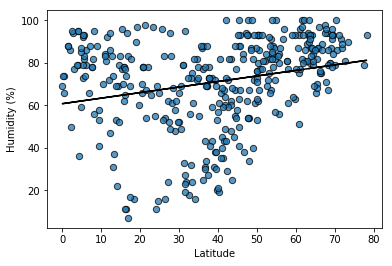

In [16]:
northern_df.plot(kind='scatter', x='Lat', y='Humidity', s=40, edgecolors='k', alpha=0.75)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

(northhumidity_slope, northhumidity_intercept, northhumidity_r, northhumidity_p, northhumidity_stderr) = linregress(northern_df['Lat'], northern_df['Humidity'])
northhumidity_regress = northern_df['Lat'] * northhumidity_slope + northhumidity_intercept
plt.plot(northern_df['Lat'], northhumidity_regress, color='k')

print(f'R-Squared: {northhumidity_r**2}')
print(f'P-Value: {format(northhumidity_p,".10f")}')
print(f'Regression Line: y = {round(northhumidity_slope, 2)}x + {round(northhumidity_intercept, 2)}')
plt.show()

####  Southern Hemisphere - Latitude vs. Humidity (%) Linear Regression

R-Squared: 0.010131196355042222
P-Value: 0.1681773346
Regression Line: y = 0.17x + 69.13


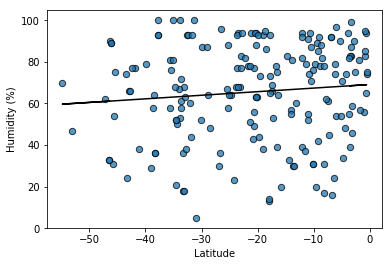

In [17]:
southern_df.plot(kind='scatter', x='Lat', y='Humidity', s=40, edgecolors='k', alpha=0.75)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

(southhumidity_slope, southhumidity_intercept, southhumidity_r, southhumidity_p, southhumidity_stderr) = linregress(southern_df['Lat'], southern_df['Humidity'])
southhumidity_regress = southern_df['Lat'] * southhumidity_slope + southhumidity_intercept
plt.plot(southern_df['Lat'], southhumidity_regress, color='k')

print(f'R-Squared: {southhumidity_r**2}')
print(f'P-Value: {format(southhumidity_p,".10f")}')
print(f'Regression Line: y = {round(southhumidity_slope, 2)}x + {round(southhumidity_intercept, 2)}')
plt.show()

The northern model for latitude vs humidity is significant (p-value<5%), but latitude only explains about 6% (northern r-squared) of the variation in humidity. The southern model is insignificant (p-value>5%) and latitude only explains about 1% (southern r-squared) of the variation in humidity. It can be concluded that latitude is not an indicator for humidity.

####  Northern Hemisphere - Latitude vs. Cloudiness (%) Linear Regression

R-Squared: 0.006705592176986044
P-Value: 0.1158455091
Regression Line: y = 0.16x + 40.15


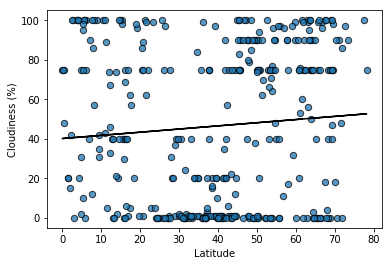

In [18]:
northern_df.plot(kind='scatter', x='Lat', y='Cloudiness', s=40, edgecolors='k', alpha=0.75)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

(northcloudiness_slope, northcloudiness_intercept, northcloudiness_r, northcloudiness_p, northcloudiness_stderr) = linregress(northern_df['Lat'], northern_df['Cloudiness'])
northcloudiness_regress = northern_df['Lat'] * northcloudiness_slope + northcloudiness_intercept
plt.plot(northern_df['Lat'], northcloudiness_regress, color='k')

print(f'R-Squared: {northcloudiness_r**2}')
print(f'P-Value: {format(northcloudiness_p,".10f")}')
print(f'Regression Line: y = {round(northcloudiness_slope, 2)}x + {round(northcloudiness_intercept, 2)}')
plt.show()

####  Southern Hemisphere - Latitude vs. Cloudiness (%) Linear Regression

R-Squared: 0.019626165309969235
P-Value: 0.0545200304
Regression Line: y = 0.36x + 51.8


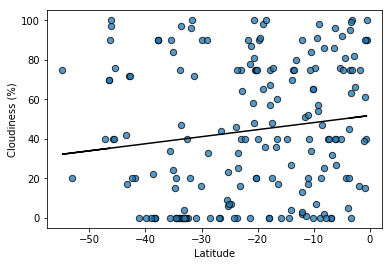

In [19]:
southern_df.plot(kind='scatter', x='Lat', y='Cloudiness', s=40, edgecolors='k', alpha=0.75)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

(southcloudiness_slope, southcloudiness_intercept, southcloudiness_r, southcloudiness_p, southcloudiness_stderr) = linregress(southern_df['Lat'], southern_df['Cloudiness'])
southcloudiness_regress = southern_df['Lat'] * southcloudiness_slope + southcloudiness_intercept
plt.plot(southern_df['Lat'], southcloudiness_regress, color='k')

print(f'R-Squared: {southcloudiness_r**2}')
print(f'P-Value: {format(southcloudiness_p,".10f")}')
print(f'Regression Line: y = {round(southcloudiness_slope, 2)}x + {round(southcloudiness_intercept, 2)}')
plt.show()

Both models for latitude vs cloudiness are insignificant (p-values>5%), and latitude only explains about 2% (southern r-squared) or less (northern r-squared). It can be conlcluded that latitude is not an indicator for cloudiness.

####  Northern Hemisphere - Latitude vs. Wind Speed (mph) Linear Regression

R-Squared: 0.019495616013841414
P-Value: 0.0071478989
Regression Line: y = 0.04x + 6.35


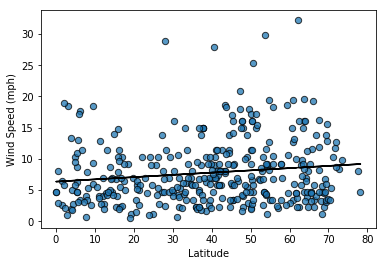

In [20]:
northern_df.plot(kind='scatter', x='Lat', y='Wind Speed', s=40, edgecolors='k', alpha=0.75)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

(northwind_slope, northwind_intercept, northwind_r, northwind_p, northwind_stderr) = linregress(northern_df['Lat'], northern_df['Wind Speed'])
northwind_regress = northern_df['Lat'] * northwind_slope + northwind_intercept
plt.plot(northern_df['Lat'], northwind_regress, color='k')

print(f'R-Squared: {northwind_r**2}')
print(f'P-Value: {format(northwind_p,".10f")}')
print(f'Regression Line: y = {round(northwind_slope, 2)}x + {round(northwind_intercept, 2)}')
plt.show()

####  Southern Hemisphere - Latitude vs. Wind Speed (mph) Linear Regression

R-Squared: 0.0675001247273768
P-Value: 0.0003058803
Regression Line: y = -0.12x + 7.02


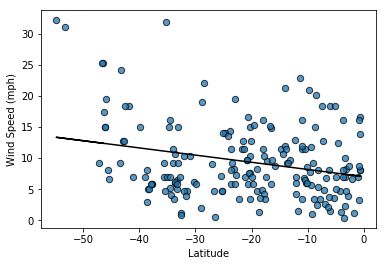

In [21]:
southern_df.plot(kind='scatter', x='Lat', y='Wind Speed', s=40, edgecolors='k', alpha=0.75)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

(southwind_slope, southwind_intercept, southwind_r, southwind_p, southwind_stderr) = linregress(southern_df['Lat'], southern_df['Wind Speed'])
southwind_regress = southern_df['Lat'] * southwind_slope + southwind_intercept
plt.plot(southern_df['Lat'], southwind_regress, color='k')

print(f'R-Squared: {southwind_r**2}')
print(f'P-Value: {format(southwind_p,".10f")}')
print(f'Regression Line: y = {round(southwind_slope, 2)}x + {round(southwind_intercept, 2)}')
plt.show()

The northern model for latitude vs wind speed is significant (p-value>5%), but latitude explains about 2% (northern r-squared) of the variation in wind speed. The southern model for latitude vs wind speed is significant (p-value<5%), but latitude only explains about 7% (southern r-squared) of the variation in wind speed. It can be concluded that latitude is not a strong indicator of wind speed.